                                                 Иззатов Эльшан Али-заде

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Лабораторная работа №9

## Библиотека Scipy. Потоки

**1.** Выберите 3 разные функции (например, парабола, гипербола, прямая, коэффициенты подберите самостоятельно). Изобразите их графики на одной координатной плоскости разными цветами (добавьте легенду). Пользователь вводит номер функции и интересующий его интервал, программа отдельно отображает выбранную функцию на данном интервале и находит точку минимума функции на данном интервале. Кроме того, программа выводит значение интеграла функции между двумя введенными точками.

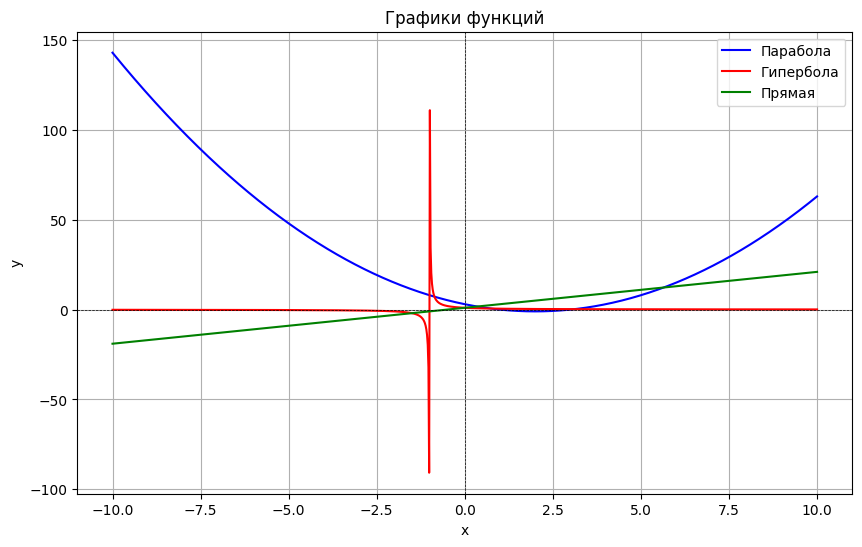

Выберите функцию:
1: Парабола
2: Гипербола
3: Прямая


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Определяем три разные функции
def parabola(x):
    return x**2 - 4*x + 3  # y = x^2 - 4x + 3

def hyperbola(x):
    with np.errstate(divide='ignore', invalid='ignore'):
        return np.where(x != 0, 1/(x+1), np.nan)

def linear(x):
    return 2*x + 1  # y = 2x + 1
# Словарь для удобного выбора функций
functions = {
    1: {"name": "Парабола", "func": parabola, "color": "blue"},
    2: {"name": "Гипербола", "func": hyperbola, "color": "red"},
    3: {"name": "Прямая", "func": linear, "color": "green"}
}

# Построение графиков всех функций на одном графике
x = np.linspace(-10, 10, 1000)  # Интервал для графиков
plt.figure(figsize=(10, 6))

for i in functions:
    y = functions[i]["func"](x)
    plt.plot(x, y, label=functions[i]["name"], color=functions[i]["color"])

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Ось X
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Ось Y
plt.title("Графики функций")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

# Ввод данных от пользователя
print("Выберите функцию:")
for i in functions:
    print(f"{i}: {functions[i]['name']}")

Введите номер функции (1, 2 или 3): 2
Введите начало интервала: -5
Введите конец интервала: 5


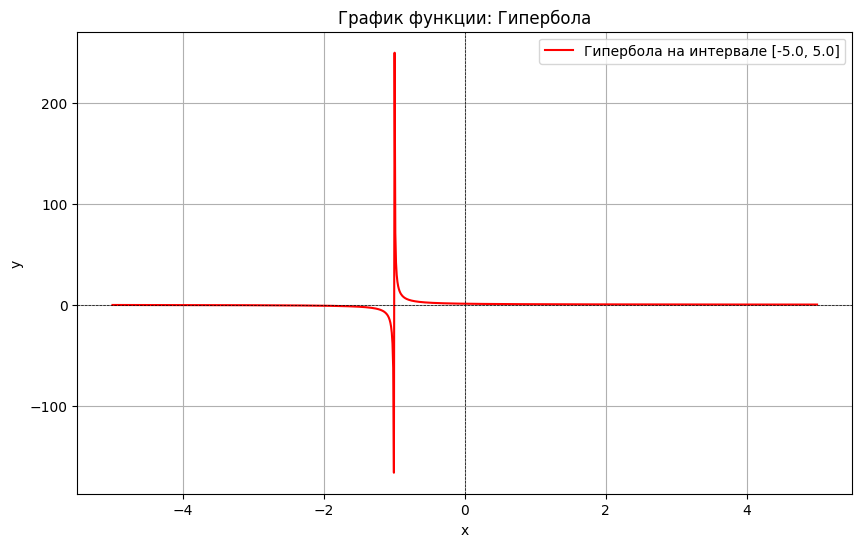

Точка минимума функции на интервале [-5.0, 5.0]: x = -1.0060, y = -166.5000
Значение интеграла функции Гипербола на интервале [-5.0, 5.0]: nan


<ipython-input-5-16b00662b8ad>:39: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(selected_function, a, b)


In [ ]:
choice = int(input("Введите номер функции (1, 2 или 3): "))
if choice not in functions:
    print("Неверный выбор функции!")
    exit()

# Ввод интервала
a = float(input("Введите начало интервала: "))
b = float(input("Введите конец интервала: "))

if a > b:
    print("Начало интервала не может быть больше конца!")
    exit()

# Выбранная функция
selected_function = functions[choice]["func"]
selected_name = functions[choice]["name"]

# Построение графика выбранной функции на заданном интервале
x_interval = np.linspace(a, b, 1000)
y_interval = selected_function(x_interval)

plt.figure(figsize=(10, 6))
plt.plot(x_interval, y_interval, label=f"{selected_name} на интервале [{a}, {b}]", color=functions[choice]["color"])
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Ось X
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Ось Y
plt.title(f"График функции: {selected_name}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

# Нахождение точки минимума на интервале
min_x = x_interval[np.argmin(y_interval)]
min_y = selected_function(min_x)
print(f"Точка минимума функции на интервале [{a}, {b}]: x = {min_x:.4f}, y = {min_y:.4f}")

# Вычисление интеграла на интервале
integral, _ = quad(selected_function, a, b)
print(f"Значение интеграла функции {selected_name} на интервале [{a}, {b}]: {integral:.4f}")

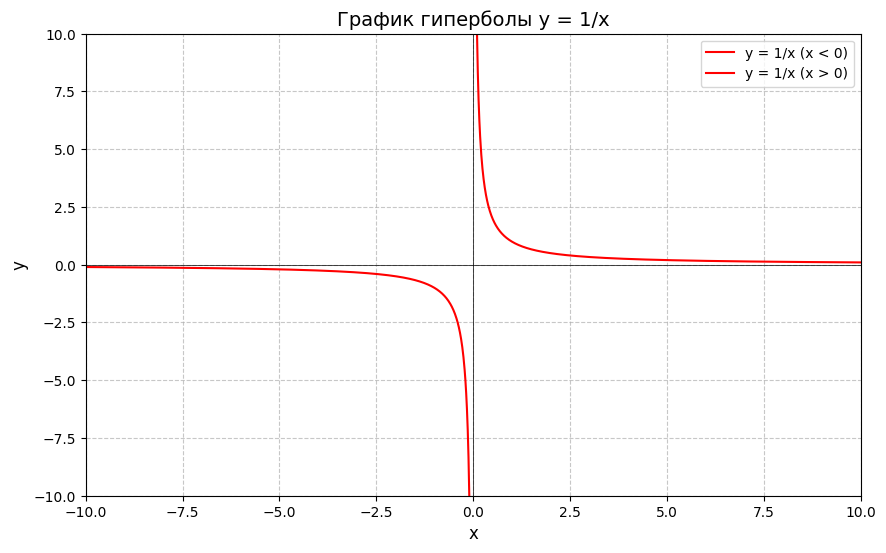

Пределы функции:
При x→0+: oo
При x→0-: -oo
При x→+∞: 0
При x→-∞: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, limit, oo

# Определение функции с обработкой разрыва
def hyperbola(x):
    with np.errstate(divide='ignore', invalid='ignore'):
        return np.where(x != 0, 1/x, np.nan)

# Создаем диапазоны для построения графика
x_left = np.linspace(-10, -0.01, 1000)  # Отрицательные значения (не включая 0)
x_right = np.linspace(0.01, 10, 1000)   # Положительные значения (не включая 0)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x_left, hyperbola(x_left), 'r-', label='y = 1/x (x < 0)')
plt.plot(x_right, hyperbola(x_right), 'r-', label='y = 1/x (x > 0)')

# Настройка графика
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("График гиперболы y = 1/x", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

# Анализ поведения на бесконечности (используем sympy)
x = symbols('x')
print("Пределы функции:")
print(f"При x→0+: {limit(1/x, x, 0, '+')}")
print(f"При x→0-: {limit(1/x, x, 0, '-')}")
print(f"При x→+∞: {limit(1/x, x, oo)}")
print(f"При x→-∞: {limit(1/x, x, -oo)}")

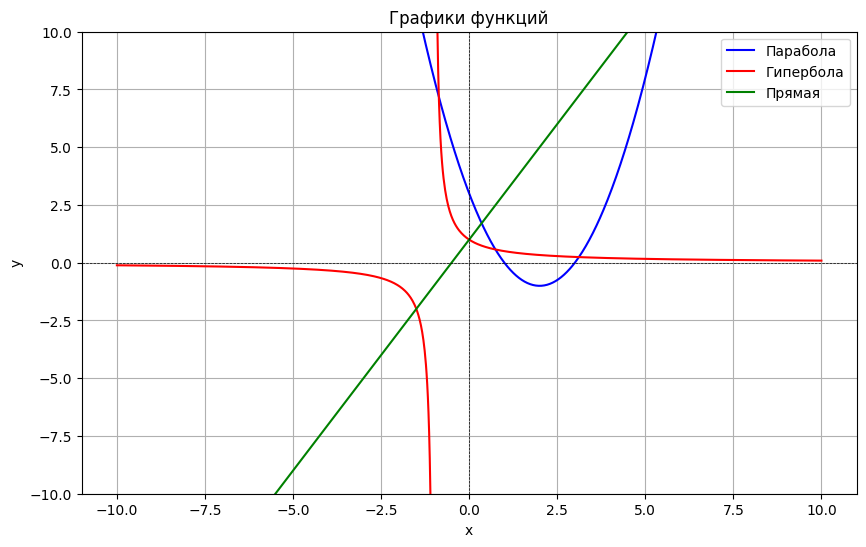

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from sympy import symbols, limit, oo

# Определяем три разные функции
def parabola(x):
    return x**2 - 4*x + 3  # y = x^2 - 4x + 3

def hyperbola(x):
    with np.errstate(divide='ignore', invalid='ignore'):
        return np.where(x != -1, 1/(x+1), np.nan)

def linear(x):
    return 2*x + 1  # y = 2x + 1

# Словарь для удобного выбора функций
functions = {
    1: {"name": "Парабола", "func": parabola, "color": "blue"},
    2: {"name": "Гипербола", "func": hyperbola, "color": "red"},
    3: {"name": "Прямая", "func": linear, "color": "green"}
}

# Построение графиков всех функций на одном графике
x = np.linspace(-10, 10, 1000)  # Интервал для графиков
plt.figure(figsize=(10, 6))

for i in functions:
    if i == 2:  # Специальная обработка для гиперболы
        # Разделяем на две части для правильного отображения разрыва
        x_left = np.linspace(-10, -1.01, 500)
        x_right = np.linspace(-0.99, 10, 500)
        plt.plot(x_left, functions[i]["func"](x_left),
                label=functions[i]["name"], color=functions[i]["color"])
        plt.plot(x_right, functions[i]["func"](x_right),
                color=functions[i]["color"])
    else:
        y = functions[i]["func"](x)
        plt.plot(x, y, label=functions[i]["name"], color=functions[i]["color"])

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Ось X
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Ось Y
plt.title("Графики функций")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.ylim(-10, 10)  # Ограничиваем y для лучшего отображения гиперболы
plt.show()

Выберите функцию:
1: Парабола
2: Гипербола
3: Прямая
Введите номер функции (1, 2 или 3): 3
Введите начало интервала: -10
Введите конец интервала: 10


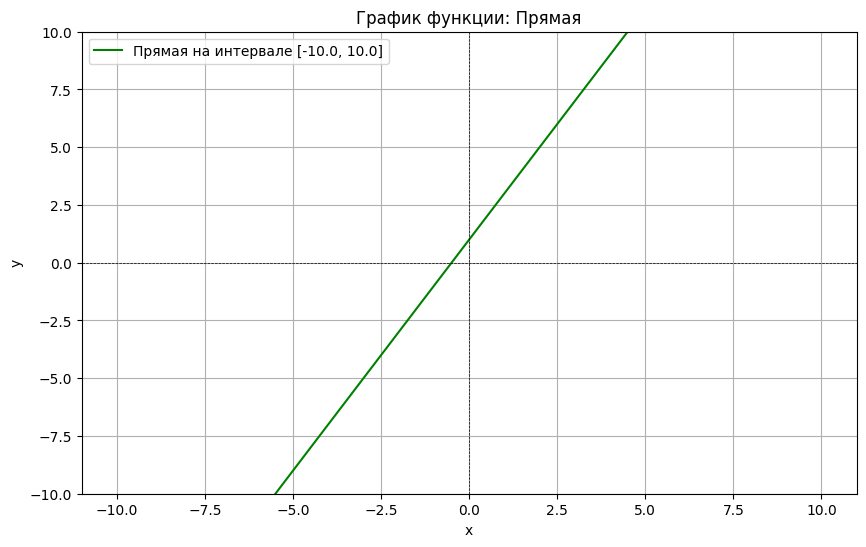

Точка минимума функции на интервале [-10.0, 10.0]: x = -10.0000, y = -19.0000
Значение интеграла функции Прямая на интервале [-10.0, 10.0]: 20.0000


In [ ]:
# Ввод данных от пользователя
print("Выберите функцию:")
for i in functions:
    print(f"{i}: {functions[i]['name']}")

choice = int(input("Введите номер функции (1, 2 или 3): "))
if choice not in functions:
    print("Неверный выбор функции!")
    exit()

# Ввод интервала
a = float(input("Введите начало интервала: "))
b = float(input("Введите конец интервала: "))

if a > b:
    print("Начало интервала не может быть больше конца!")
    exit()

# Выбранная функция
selected_function = functions[choice]["func"]
selected_name = functions[choice]["name"]

# Построение графика выбранной функции на заданном интервале
plt.figure(figsize=(10, 6))

if choice == 2:  # Специальная обработка для гиперболы
    # Разделяем интервал на части, исключая точку разрыва x = -1
    x_points = np.linspace(a, b, 1000)
    mask = np.abs(x_points + 1) > 0.02  # Исключаем область вокруг разрыва
    x_interval = x_points[mask]

    # Разделяем на левую и правую части для лучшего отображения
    x_left = x_interval[x_interval < -1]
    x_right = x_interval[x_interval > -1]

    if len(x_left) > 0:
        plt.plot(x_left, selected_function(x_left),
                label=f"{selected_name} на интервале [{a}, {b}]",
                color=functions[choice]["color"])
    if len(x_right) > 0:
        plt.plot(x_right, selected_function(x_right),
                color=functions[choice]["color"])
else:
    x_interval = np.linspace(a, b, 1000)
    plt.plot(x_interval, selected_function(x_interval),
            label=f"{selected_name} на интервале [{a}, {b}]",
            color=functions[choice]["color"])

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Ось X
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Ось Y
plt.title(f"График функции: {selected_name}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.ylim(-10, 10)  # Ограничиваем y для лучшего отображения гиперболы
plt.show()

# Нахождение точки минимума на интервале
if choice == 2:
    # Для гиперболы нужно исключить точку разрыва из поиска минимума
    x_points = np.linspace(a, b, 1000)
    mask = np.abs(x_points + 1) > 0.02  # Исключаем область вокруг разрыва
    x_filtered = x_points[mask]
    y_filtered = selected_function(x_filtered)
    min_idx = np.argmin(y_filtered)
    min_x = x_filtered[min_idx]
    min_y = y_filtered[min_idx]
else:
    x_interval = np.linspace(a, b, 1000)
    y_interval = selected_function(x_interval)
    min_x = x_interval[np.argmin(y_interval)]
    min_y = selected_function(min_x)

print(f"Точка минимума функции на интервале [{a}, {b}]: x = {min_x:.4f}, y = {min_y:.4f}")

# Вычисление интеграла на интервале
if choice == 2 and (a < -1 < b):
    # Для гиперболы разбиваем интеграл на две части вокруг точки разрыва
    integral1, _ = quad(selected_function, a, -1 - 1e-8)
    integral2, _ = quad(selected_function, -1 + 1e-8, b)
    integral = integral1 + integral2
else:
    integral, _ = quad(selected_function, a, b)

print(f"Значение интеграла функции {selected_name} на интервале [{a}, {b}]: {integral:.4f}")

# Анализ поведения гиперболы (только если выбрана гипербола)
if choice == 2:
    x_sym = symbols('x')
    print("\nАнализ поведения гиперболы:")
    print(f"Предел при x→-1+: {limit(1/(x_sym+1), x_sym, -1, '+')}")
    print(f"Предел при x→-1-: {limit(1/(x_sym+1), x_sym, -1, '-')}")
    print(f"Предел при x→+∞: {limit(1/(x_sym+1), x_sym, oo)}")
    print(f"Предел при x→-∞: {limit(1/(x_sym+1), x_sym, -oo)}")

**2.** Написать программу, которая вычисляет факториал числа 100 000 и показывает, сколько времени ушло на решение этой задачи. Сначала требуется решить задачу с использованием одного потока, затем с двумя, четырьмя, восьмью. При использовании двух потоков один поток перемножает числа от 1 до 50 000, а второй – от 50 001 до 100 000, а затем результаты перемножаются (можно поэкспериментировать с разделением работы на две части, не обязательно делить интервал пополам, деление осуществлять автоматически). Сравните результаты вычисления факториала (нужно, чтобы результаты совпадали) и время вычисления при каждом способе.

In [ ]:
import math
import time
from multiprocessing import Pool

# Функция для вычисления факториала на заданном интервале
def factorial_partial(start, end):
    result = 1
    for i in range(start, end + 1):
        result *= i
    return result

# Функция для вычисления факториала с использованием нескольких потоков
def factorial_multithreaded(n, num_threads):
    # Определяем разделение интервала
    step = n // num_threads
    intervals = [(i * step + 1, (i + 1) * step) for i in range(num_threads)]
    intervals[-1] = (intervals[-1][0], n)  # Убедимся, что последний интервал доходит до n

    # Запускаем вычисления в нескольких потоках
    with Pool(num_threads) as pool:
        partial_results = pool.starmap(factorial_partial, intervals)

    # Перемножаем результаты из всех потоков
    result = 1
    for partial in partial_results:
        result *= partial
    return result

# Основная функция для сравнения времени выполнения
def main():
    n = 100_000  # Факториал числа 100,000

    # Однопоточное вычисление
    start_time = time.time()
    factorial_single = factorial_partial(1, n)
    single_thread_time = time.time() - start_time
    print(f"Однопоточное вычисление: {single_thread_time:.2f} секунд")

    # Двухпоточное вычисление
    start_time = time.time()
    factorial_two_threads = factorial_multithreaded(n, 2)
    two_thread_time = time.time() - start_time
    print(f"Двухпоточное вычисление: {two_thread_time:.2f} секунд")

    # Четырёхпоточное вычисление
    start_time = time.time()
    factorial_four_threads = factorial_multithreaded(n, 4)
    four_thread_time = time.time() - start_time
    print(f"Четырёхпоточное вычисление: {four_thread_time:.2f} секунд")

    # Восьмипоточное вычисление
    start_time = time.time()
    factorial_eight_threads = factorial_multithreaded(n, 8)
    eight_thread_time = time.time() - start_time
    print(f"Восьмипоточное вычисление: {eight_thread_time:.2f} секунд")

    # Проверка совпадения результатов
    assert factorial_single == factorial_two_threads, "Результаты для двух потоков не совпадают!"
    assert factorial_single == factorial_four_threads, "Результаты для четырёх потоков не совпадают!"
    assert factorial_single == factorial_eight_threads, "Результаты для восьми потоков не совпадают!"
    print("Результаты совпадают для всех потоков!")

if __name__ == "__main__":
    main()

Однопоточное вычисление: 2.62 секунд
Двухпоточное вычисление: 1.43 секунд
Четырёхпоточное вычисление: 0.88 секунд
Восьмипоточное вычисление: 0.68 секунд
Результаты совпадают для всех потоков!


In [2]:
import math
import time
import threading
import queue

# Функция для вычисления факториала на заданном интервале и записи результата в очередь
def factorial_partial(start, end, result_queue):
    result = 1
    for i in range(start, end + 1):
        result *= i
    result_queue.put(result)

# Функция для вычисления факториала с использованием нескольких потоков
def factorial_multithreaded(n, num_threads):
    # Определяем разделение интервала
    step = n // num_threads
    intervals = [(i * step + 1, (i + 1) * step) for i in range(num_threads)]
    intervals[-1] = (intervals[-1][0], n)  # Убедимся, что последний интервал доходит до n

    # Создаем очередь для получения результатов
    result_queue = queue.Queue()
    threads = []

    # Запускаем потоки
    for start, end in intervals:
        thread = threading.Thread(target=factorial_partial, args=(start, end, result_queue))
        threads.append(thread)
        thread.start()

    # Ожидаем завершения всех потоков
    for thread in threads:
        thread.join()

    # Собираем результаты из очереди
    partial_results = []
    while not result_queue.empty():
        partial_results.append(result_queue.get())

    # Перемножаем результаты из всех потоков
    result = 1
    for partial in partial_results:
        result *= partial
    return result

# Основная функция для сравнения времени выполнения
def main():
    n = 100_000  # Факториал числа 100,000

    # Однопоточное вычисление
    start_time = time.time()
    factorial_single = 1
    for i in range(1, n + 1):
        factorial_single *= i
    single_thread_time = time.time() - start_time
    print(f"Однопоточное вычисление: {single_thread_time:.2f} секунд")

    # Двухпоточное вычисление
    start_time = time.time()
    factorial_two_threads = factorial_multithreaded(n, 2)
    two_thread_time = time.time() - start_time
    print(f"Двухпоточное вычисление: {two_thread_time:.2f} секунд")

    # Четырёхпоточное вычисление
    start_time = time.time()
    factorial_four_threads = factorial_multithreaded(n, 4)
    four_thread_time = time.time() - start_time
    print(f"Четырёхпоточное вычисление: {four_thread_time:.2f} секунд")

    # Восьмипоточное вычисление
    start_time = time.time()
    factorial_eight_threads = factorial_multithreaded(n, 8)
    eight_thread_time = time.time() - start_time
    print(f"Восьмипоточное вычисление: {eight_thread_time:.2f} секунд")

    # Проверка совпадения результатов
    assert factorial_single == factorial_two_threads, "Результаты для двух потоков не совпадают!"
    assert factorial_single == factorial_four_threads, "Результаты для четырёх потоков не совпадают!"
    assert factorial_single == factorial_eight_threads, "Результаты для восьми потоков не совпадают!"
    print("Результаты совпадают для всех потоков!")

if __name__ == "__main__":
    main()

Однопоточное вычисление: 3.68 секунд
Двухпоточное вычисление: 2.06 секунд
Четырёхпоточное вычисление: 0.86 секунд
Восьмипоточное вычисление: 0.56 секунд
Результаты совпадают для всех потоков!


**3.** Написать многопоточную программу, в которой каждый из двух потоков записывает в файл свой номер (1 или 2) 100 000 раз. Файл для обоих потоков один и тот же. Не допускается, чтобы сначала запись выполнял один поток полностью, а потом второй. Автоматически проверить, реально ли в результате в файле записано 100 000 единиц и 100 000 двоек.

In [3]:
import threading
import traceback

# Количество записей от каждого потока
NUM_WRITES = 100_000
OUTPUT_FILE = "output.txt"

# Счетчики для проверки
ones_count = 0
twos_count = 0

# Блокировка для синхронизации потоков
lock = threading.Lock()

# Функция записи в файл
def write_to_file(thread_id):
    try:
        with open(OUTPUT_FILE, "a") as f:
            for _ in range(NUM_WRITES):
                with lock:  # Синхронизируем доступ к файлу
                    f.write(str(thread_id) + "\n")
    except Exception as e:
        print(f"[Ошибка] Поток {thread_id}: {e}")
        traceback.print_exc()

# Основная функция
def main():
    global ones_count, twos_count

    try:
        # Очищаем файл перед началом работы
        try:
            with open(OUTPUT_FILE, "w") as f:
                pass
        except Exception as e:
            print(f"[Ошибка] Не удалось очистить файл: {e}")
            return

        # Создаем два потока
        thread1 = threading.Thread(target=write_to_file, args=(1,))
        thread2 = threading.Thread(target=write_to_file, args=(2,))

        # Запускаем потоки
        thread1.start()
        thread2.start()

        # Дожидаемся завершения потоков
        thread1.join()
        thread2.join()

        # Проверяем содержимое файла
        try:
            with open(OUTPUT_FILE, "r") as f:
                contents = f.readlines()
        except Exception as e:
            print(f"[Ошибка] Не удалось прочитать файл: {e}")
            return

        # Подсчитываем количество единиц и двоек
        ones_count = contents.count("1\n")
        twos_count = contents.count("2\n")

        print(f"Количество единиц (1): {ones_count}")
        print(f"Количество двоек (2): {twos_count}")

        # Проверяем корректность результата
        if ones_count == NUM_WRITES and twos_count == NUM_WRITES:
            print("Результат корректен: 100,000 единиц и 100,000 двоек.")
        else:
            print("Ошибка: Результат некорректен!")

    except Exception as e:
        print(f"[Ошибка] В процессе выполнения: {e}")
        traceback.print_exc()

if __name__ == "__main__":
    main()

Количество единиц (1): 100000
Количество двоек (2): 100000
Результат корректен: 100,000 единиц и 100,000 двоек.
